In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

import statistics

import json
from shapely.geometry import Point

import pickle

import time
import datetime

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score


In [8]:
BIGMERGED_day_tn4 = pd.read_pickle('../data/processed/BIGMERGED_day_tn4.pkl')
BIGMERGED_night_tn4 = pd.read_pickle('../data/processed/BIGMERGED_night_tn4.pkl')

# CLASSIFICAZIONE

In [9]:
features = BIGMERGED_day_tn4.columns
features = features[features != 'index_cons_x'] #tolgo 'index_cons_x' che è il mio targhet
features

Index(['precipitation_x', 'minTemperature_x', 'maxTemperature_x', 'cellId',
       'timestamp_x', 'weekday_x', 'precipitation_y', 'minTemperature_y',
       'maxTemperature_y', 'index_cons_y', 'precipitation', 'minTemperature',
       'maxTemperature', 'index_cons'],
      dtype='object')

In [10]:
train, test = train_test_split(BIGMERGED_day_tn4, test_size = 0.25)

In [11]:
log_reg = LogisticRegression(solver='saga', max_iter=1000, tol=0.001)

#penalty default=’l2’
#solver is the algorithm to use in the optimization problem. 'saga' is good for large datasets
#max_iter= Maximum number of iterations taken for the solvers to converge.
#tol=Tolerance for stopping criteria.

scaler = StandardScaler()
#Standardize features by removing the mean and scaling to unit variance.
#Standardization of a dataset is a common requirement for many machine learning estimators: 
#they might behave badly if the individual features do not more or less look like standard normally distributed data

pipe_lr = Pipeline([('scaler',scaler), ('logreg',log_reg)])

Let’s create the parameter grid, which is a dictionary containing all the various hyperparameters that you want to try when fitting your model:

In [12]:
param_grid = {
    'logreg__penalty': ['l2','l1'],
    'logreg__C': np.logspace(-4, 4, 4),
}

#C = Inverse of regularization strength; smaller values specify stronger regularization.

In [13]:
param = {'penalty':'l1', 'solver':'saga','C':1.0}
LogisticRegression(**param)

LogisticRegression(penalty='l1', solver='saga')

GridSearchCV

It allows you to specify the different values for each hyperparameter and try out all the possible combinations when fitting your model. It does the training and testing using cross validation of your dataset — hence the acronym “CV” in GridSearchCV. The end result of GridSearchCV is a set of hyperparameters that best fit your data according to the scoring metric that you want your model to optimize on.

In [14]:
gridsearch = GridSearchCV(pipe_lr, param_grid=param_grid, cv=10)

The GridSearchCV() function returns a LogisticRegression instance, which you can then train using your training set:

In [15]:
gridsearch.fit(train[features], train['index_cons_x'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'logreg__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'logreg__penalty': ['l2', 'l1']})

In [16]:
print("Tuned Hyperparameters :", gridsearch.best_params_)

#'l2' me lo aspettavo --> in teoria funziona meglio quando tutte le features hanno importanza 

Tuned Hyperparameters : {'logreg__C': 0.046415888336127774, 'logreg__penalty': 'l1'}


In [17]:
gridsearch.score(test[features], test['index_cons_x'])

0.9732394366197183

/home/irene/anaconda3/envs/DS/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


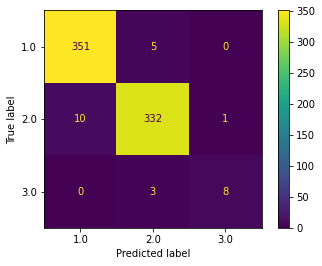

In [18]:
plot_confusion_matrix(gridsearch, test[features], test.index_cons_x)

PER LA SERA INVECE

In [19]:
features_night = BIGMERGED_night_tn4.columns
features_night = features_night[features_night != 'index_cons_x'] #tolgo 'index_cons_x' che è il mio targhet
features_night

Index(['precipitation_x', 'minTemperature_x', 'maxTemperature_x', 'cellId',
       'timestamp_x', 'weekday_x', 'precipitation_y', 'minTemperature_y',
       'maxTemperature_y', 'index_cons_y', 'precipitation', 'minTemperature',
       'maxTemperature', 'index_cons'],
      dtype='object')

In [20]:
train_n, test_n = train_test_split(BIGMERGED_night_tn4, test_size = 0.25)

In [21]:
gridsearch.fit(train_n[features], train_n['index_cons_x'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'logreg__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'logreg__penalty': ['l2', 'l1']})

In [22]:
gridsearch.score(test_n[features], test_n['index_cons_x'])

0.9929577464788732

/home/irene/anaconda3/envs/DS/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


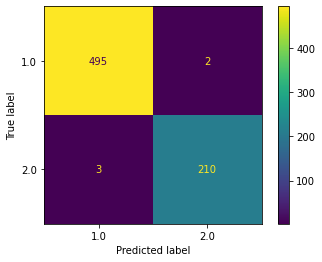

In [23]:
plot_confusion_matrix(gridsearch, test_n[features], test_n.index_cons_x)

# PROVO ANCHE CON LA RANDOM FOREST!!!

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
#PROVO ANCHE CON LA RANDOM FOREST!!!

from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [26]:
 pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor())    
    ])

In [27]:
param_grid = {
        'regressor__n_estimators': [10, 100, 500],
        'regressor__max_depth': [10,100,None],
        'regressor__min_samples_split': [10, 50, 100],
        'regressor__max_features': [4,6,8]
    }

In [28]:
gridsearch = GridSearchCV(pipe, param_grid=param_grid)

In [29]:
gridsearch.fit(train[features], train['index_cons_x'])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [10, 100, None],
                         'regressor__max_features': [4, 6, 8],
                         'regressor__min_samples_split': [10, 50, 100],
                         'regressor__n_estimators': [10, 100, 500]})

In [30]:
gridsearch.best_params_

{'regressor__max_depth': None,
 'regressor__max_features': 8,
 'regressor__min_samples_split': 100,
 'regressor__n_estimators': 10}

In [31]:
gridsearch.score(test[features], test['index_cons_x'])

0.930699301607236